# Clasificación de imágenes usando CNN

> Usando parte del dataset de [ymalov](https://www.kaggle.com/ymalov/simpsons).

### Info del sistema

In [1]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


In [2]:
!nvidia-smi 

Thu Aug 19 21:12:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Montamos el Drive.


In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/dset/

test  train


### Importamos librerías

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import os 
import random

## Generación y entrenamiento del modelo de CNN

### Inicializamos la clase ImageDataGenerator de Keras

In [6]:
imagen_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    #rotation_range = 45,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.15)

# validation_split :
# Reserva una fracción de imágenes para validación.

test_datagen = ImageDataGenerator(rescale = 1./255)

### Inicializamos el conjunto de entrenamiento, validación y pruebas

Dimensiones a las que se cambiará el tamaño de todas las imágenes encontradas.

In [7]:
img_size = (100, 100)

In [8]:
training_set = imagen_datagen.flow_from_directory(
    '/content/drive/MyDrive/dset/train',
    target_size = img_size,
    batch_size = 32,
    class_mode = 'binary',
    subset = 'training')

eval_set = imagen_datagen.flow_from_directory(
    '/content/drive/MyDrive/dset/train',
    target_size = img_size,
    batch_size = 32,
    class_mode = 'binary',
    subset = 'validation')

test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/dset/test',
    target_size = img_size,
    batch_size = 1,
    class_mode = None,
    shuffle = False)

Found 2553 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 133 images belonging to 1 classes.


### Definimos el modelo

In [9]:
model = tf.keras.models.Sequential([            
  #tf.keras.layers.experimental.preprocessing.Resizing(*img_size,
  #                                                    interpolation='bilinear'),                          
  tf.keras.layers.Conv2D(6, (6, 6), activation='relu',                          
                         input_shape=(*img_size, 3)),                              
  tf.keras.layers.Conv2D(12, (5, 5), strides=(2, 2), activation='relu'),        
  tf.keras.layers.Conv2D(24, (4, 4), strides=(2, 2), activation='relu'),        
  tf.keras.layers.Flatten(),                                                    
  tf.keras.layers.Dropout(rate=.25),                                            
  tf.keras.layers.Dense(200, activation='relu'),                                
  tf.keras.layers.Dense(3, activation='softmax')                               
])
# Eliminé la primer capa porque me da problemas para reconocer el modelo si lo guardo                                                                             
                                                                                
optimizer = tf.keras.optimizers.Adam(decay=.0001)

model.compile(optimizer=optimizer,                                              
              loss='sparse_categorical_crossentropy',                           
              metrics=['accuracy'])

### Entrenamos el modelo en el conjunto de entrenamiento

In [10]:
model.fit(training_set, epochs = 25)

Epoch 1/25
80/80 [==============================] - 1775s 22s/step - loss: 0.8739 - accuracy: 0.6040
Epoch 2/25
80/80 [==============================] - 17s 215ms/step - loss: 0.6795 - accuracy: 0.7215
Epoch 3/25
80/80 [==============================] - 17s 215ms/step - loss: 0.6414 - accuracy: 0.7372
Epoch 4/25
80/80 [==============================] - 17s 213ms/step - loss: 0.6067 - accuracy: 0.7595
Epoch 5/25
80/80 [==============================] - 17s 212ms/step - loss: 0.5765 - accuracy: 0.7618
Epoch 6/25
80/80 [==============================] - 17s 213ms/step - loss: 0.5335 - accuracy: 0.7932
Epoch 7/25
80/80 [==============================] - 17s 213ms/step - loss: 0.4892 - accuracy: 0.8053
Epoch 8/25
80/80 [==============================] - 17s 212ms/step - loss: 0.4529 - accuracy: 0.8257
Epoch 9/25
80/80 [==============================] - 17s 211ms/step - loss: 0.4326 - accuracy: 0.8249
Epoch 10/25
80/80 [==============================] - 17s 213ms/step - loss: 0.3992 - accura

### Evaluamos el modelo en el subconjunto de evaluación

In [35]:
score = model.evaluate(eval_set)

15/15 [==============================] - 3s 193ms/step - loss: 0.8690 - accuracy: 0.7533


### Resultados del modelo

In [36]:
model.summary()

print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 95, 95, 6)         654       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 12)        1812      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 24)        4632      
_________________________________________________________________
flatten (Flatten)            (None, 11616)             0         
_________________________________________________________________
dropout (Dropout)            (None, 11616)             0         
_________________________________________________________________
dense (Dense)                (None, 200)               2323400   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6

## Guardado y recuperación del modelo

Para guardar el modelo entrenado:

In [28]:
#model.save('/content/drive/MyDrive/models/model_TP12Class.h5')

Para cargar el modelo guardado:

In [30]:
#model = tf.keras.models.load_model('/content/drive/MyDrive/models/model_TP12Class.h5')

## Pruebas del modelo con el conjunto de *test*

In [23]:
path = "/content/drive/MyDrive/dset/test/"
dir_prueba = os.listdir(path)

fname = test_set.filenames
print(len(fname))

133


Prueba con algunas imágenes selecionadas al azar:

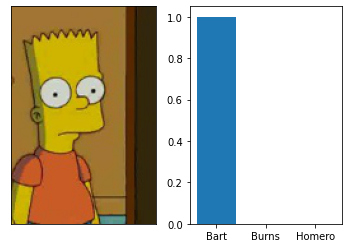

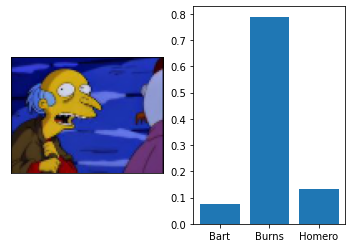

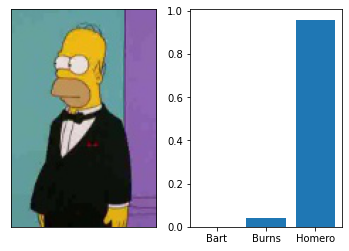

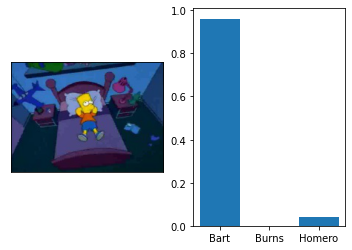

In [44]:
for i in range(4):
  ran = random.randrange(0,len(fname))

  pred = model1.predict(test_set[ran])[0]
  #print(pred)

  fig = plt.figure()
  ax1 = fig.add_subplot(1, 2, 1)

  img = plt.imread(os.path.join(path, fname[ran]))
  ax1.imshow(img)
  ax1.set_xticks([])
  ax1.set_yticks([])

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.bar(['Bart', 'Burns', 'Homero'], pred)
  #plt.xticks(rotation=90)
  plt.show()


***
***